In [4]:
import json
import random
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [9]:
filePath = "fakeData.json"
latMin = 43.72261
latMax = 43.72436
lonMin = 10.39286
lonMax = 10.39774

df = pd.DataFrame(columns=['latitude', 'longitude', 'score'])
print(df)

with open(filePath, mode='w', encoding='utf-8') as f:
    f.write('{"FakeData": [')

for i in range(100):
   
    latitude = random.random()*(latMax - latMin) + latMin
    longitude = random.random()*(lonMax - lonMin) + lonMin
    score = random.random()*(0-1)+1

    recordJSON = {
        "latitude":latitude,
        "longitude":longitude,
        "score":score,                            
    }
    
    df.loc[len(df)] = [latitude, longitude, score]
    

    with open(filePath, "a") as f:
        if i != 0:  
            f.write(",")
        json.dump(recordJSON, f, indent=4)
        
with open(filePath, mode='a', encoding='utf-8') as f:
   f.write(",")  
    
latMin = 43.7211
latMax = 43.7212
lonMin = 10.3880
lonMax = 10.3913

for i in range(50):
    latitude = random.random()*(latMax - latMin) + latMin
    longitude = random.random()*(lonMax - lonMin) + lonMin
    score = random.random()*(0-1)+1

    recordJSON = {
        "latitude":latitude,
        "longitude":longitude,
        "score":score,                            
    }

    df.loc[len(df)] = [latitude, longitude, score]

    with open(filePath, "a") as f:
        if i != 0:  
            f.write(",")
        json.dump(recordJSON, f, indent=4)

with open(filePath, mode='a', encoding='utf-8') as f:
   f.write(",")

latMin = 43.71911
latMax = 43.71977
lonMin = 10.39971
lonMax = 10.40084

for i in range(100):
    latitude = random.random()*(latMax - latMin) + latMin
    longitude = random.random()*(lonMax - lonMin) + lonMin
    score = random.random()*(0-1)+1

    recordJSON = {
        "latitude":latitude,
        "longitude":longitude,
        "score":score,                            
    }

    df.loc[len(df)] = [latitude, longitude, score]

    with open(filePath, "a") as f:
        if i != 0:  
            f.write(",")
        json.dump(recordJSON, f, indent=4)

with open(filePath, mode='a', encoding='utf-8') as f:
   f.write(",")

latMin = 43.7164
latMax = 43.7269
lonMin = 10.3868
lonMax = 10.4032

for i in range(30):
    latitude = random.random()*(latMax - latMin) + latMin
    longitude = random.random()*(lonMax - lonMin) + lonMin
    score = random.random()*(0-1)+1

    recordJSON = {
        "latitude":latitude,
        "longitude":longitude,
        "score":score,                            
    }

    df.loc[len(df)] = [latitude, longitude, score]

    with open(filePath, "a") as f:
        if i != 0:  
            f.write(",")
        json.dump(recordJSON, f, indent=4)
            

with open(filePath, mode='a', encoding='utf-8') as f:
   f.write("]}")

Empty DataFrame
Columns: [latitude, longitude, score]
Index: []


In [45]:
df.to_csv('fakeData.csv')

In [11]:
df = pd.read_json('emotion-tracker.json')
df

,latitude,longitude,score
0,43.723456,10.392877,0.414940
1,43.724250,10.396174,0.592379
2,43.723201,10.396209,0.507752
3,43.723709,10.393309,0.779402
4,43.722885,10.396472,0.691728
...,...,...,...
275,43.721255,10.391004,0.013986
276,43.719653,10.398866,0.024077
277,43.725180,10.397881,0.750499
278,43.717939,10.396527,0.611467


In [2]:
df = pd.read_csv('fakeData.csv', index_col=0)
df

,latitude,longitude,score
0,43.723456,10.392877,0.414940
1,43.724250,10.396174,0.592379
2,43.723201,10.396209,0.507752
3,43.723709,10.393309,0.779402
4,43.722885,10.396472,0.691728
...,...,...,...
275,43.721255,10.391004,0.013986
276,43.719653,10.398866,0.024077
277,43.725180,10.397881,0.750499
278,43.717939,10.396527,0.611467


In [3]:
X = df.drop(['score'], axis=1)

In [94]:

list_sil = pd.DataFrame(columns=["min_samples", "eps", "silhouette_coefficient"])

for ms in range(100):
    for eps in {0.001, 0.0015, 0.002, 0.0025, 0.003}:
        # Crea un modello DBSCAN con eps=0.3 e min_samples=5
        dbscan = DBSCAN(eps=eps, min_samples=ms)

        # Esegue il clustering sui dati
        y_pred = dbscan.fit_predict(X)

        y_pred[0] = 2
        silhouette_coefficient = silhouette_score(X, y_pred)
        # print(str(ms) + ") Silhouette:", silhouette_coefficient)

        nuova_riga = pd.Series({"min_samples": ms, "eps":eps, "silhouette_coefficient":silhouette_coefficient})
        list_sil = list_sil.append(nuova_riga, ignore_index=True)
   

# list_sil.sort_index(["silhouette_coefficient"])
display(list_sil.sort_values(by='silhouette_coefficient', ascending=False))
    

,min_samples,eps,silhouette_coefficient
197,39.0,0.002,0.725651
167,33.0,0.002,0.725651
157,31.0,0.002,0.725651
152,30.0,0.002,0.725651
28,5.0,0.0015,0.725651
147,29.0,0.002,0.725651
142,28.0,0.002,0.725651
137,27.0,0.002,0.725651
132,26.0,0.002,0.725651
38,7.0,0.0015,0.725651


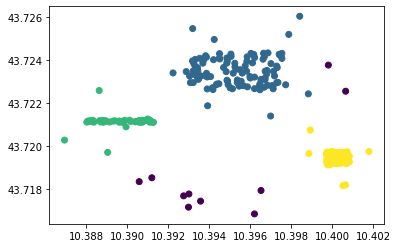

Il coefficiente di Silhouette è: 0.7256511057363798


In [12]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Crea un modello DBSCAN con eps=0.0015 e min_samples=5
#5.0	0.0015
dbscan = DBSCAN(eps=0.0015, min_samples=5)

# Esegue il clustering sui dati
y_pred = dbscan.fit_predict(X)

# Visualizziamo il risultato del clustering
plt.scatter(X.iloc[:,1], X.iloc[:,0], c=y_pred, cmap='viridis')
plt.show()


y_pred[0] = 2
silhouette_coefficient = silhouette_score(X, y_pred)
print("Il coefficiente di Silhouette è:", silhouette_coefficient)


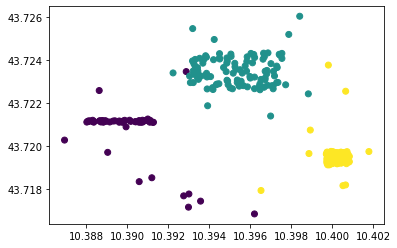

Il coefficiente di Silhouette è: 0.7239261408980403


In [101]:
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

X = df.drop(['score'], axis=1)
# Crea un modello DBSCAN con eps=0.3 e min_samples=5
optics = OPTICS(min_samples=100)

# Esegue il clustering sui dati
y_pred = optics.fit_predict(X)

# Visualizziamo il risultato del clustering
plt.scatter(X.iloc[:,1], X.iloc[:,0], c=y_pred, cmap='viridis')
plt.show()

silhouette_coefficient = silhouette_score(X, y_pred)
print("Il coefficiente di Silhouette è:", silhouette_coefficient)